# Regressió polinòmica multivariable
--------------------

En aquest Notebook volem estudiar el preu de les vivendes de Brooklyn en funció de dues o tres variables i també en funció de regressions polinòmiques.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dataset extret de
# https://www.kaggle.com/datasets/ciphernine/brooklyn-real-estate-listings
df = pd.read_csv('dataset/brooklyn_real_estate.csv')
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft,neighborhood,status,address
0,1,4100000.0,4,5,2940.0,Park Slope,sold,"336A 4th St, Brooklyn, NY 11215"
1,2,1020000.0,3,1,NaN,Park Slope,sold,"411 15th St #K, Brooklyn, NY 11215"
2,3,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #D, Brooklyn, NY 11217"
3,4,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #E, Brooklyn, NY 11217"
4,5,908000.0,0,1,1066.0,Park Slope,sold,"397 1st St #4R, Brooklyn, NY 11215"


## Exemple amb 2 variables (els metres quadrats i el nº de banys)

In [32]:
# En aqeust exemple intentarem estimar el preu dels habitatges en funció del número de banys, i metres quadrats (peus quadrats)
data = df[['price','bathrooms','sqft']].dropna()

# Mostrem una quantitat de dades
data.head()
#print(df.sample(n=15))

,price,bathrooms,sqft
0,4100000.0,5,2940.0
4,908000.0,1,1066.0
6,2600000.0,4,3600.0
7,4050000.0,4,3600.0
8,2400000.0,3,1428.0


In [33]:
# Separem els valors de X i Y
x_values = data[['bathrooms','sqft']].values
y_values = data['price'].values


In [34]:
#definim el grau del nostre polinomi, amb el grau que volem. En aquest cas 2
degree=2

# PolynomialFeatures crearà una nova matriu formada per totes les combinacions de polinomis
# de les característiques amb un grau inferior o igual al grau que acabem de donar al model (2)
poly_model = PolynomialFeatures(degree=degree)

# Transformem les variables a(x1) i b(x2) amb les característiques del polinomi definit (grau=2)
poly_x_values = poly_model.fit_transform(x_values)

# La forma del polinomi hauria de ser [1, a, b, a^2, ab, b^2]
print(f'Valors inicials {x_values[0]}\nMapejats(Polinomi) {poly_x_values[0]}')

# grau 2 [1, a=5, b=2940, a^2=25, a·b=5*2940=14700, b^2=8643600]
# grau 3 [1, a=5, b=2940, a^2=25, a·b=5*2940=14700, b^2=8643600, b·a^2=73500, a·b^2=43218000, a^3=125, b^3=25412184000]

Valors inicials [2940.]
Mapejats(Polinomi) [1.0000e+00 2.9400e+03 8.6436e+06]


In [35]:
# Entrenem el model
poly_model.fit(poly_x_values, y_values)

poly_reg = LinearRegression()

poly_reg.fit(poly_x_values, y_values)

y_pred = poly_reg.predict(poly_x_values)

#[1, a, b, a^2, a·b, b^2]
print(f"intercept: {poly_reg.intercept_}")

print(f"coefficients: {poly_reg.coef_}")

#mean_squared_error(y_values, y_pred, squared=False)

intercept: 995026.4544949769
coefficients: [ 0.00000000e+00  1.52416417e+02 -3.66579631e-04]


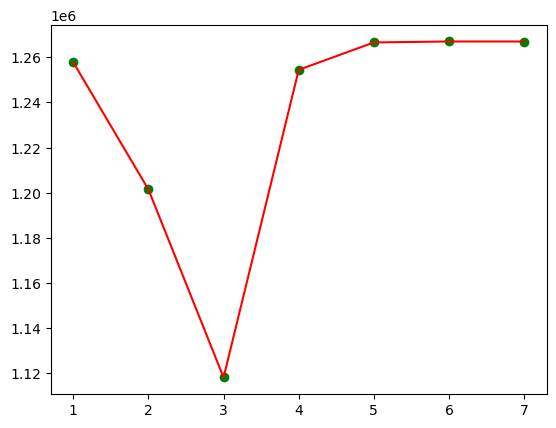

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Mirem per cada grau quin error tenim i r2
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
plt_r_squared = []

for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)
  
    poly_x_values = poly_model.fit_transform(x_values)
    #poly_model.fit(poly_x_values, y_values)
  
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)
  
    plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
    plt_r_squared.append(r2_score(y_values, y_pred))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

[0.014676824945194622,
 0.10101922966191235,
 0.22144854116040447,
 0.01988180529490291,
 0.000820151488681975,
 0.0001452418447622783,
 0.0001646798609893363]

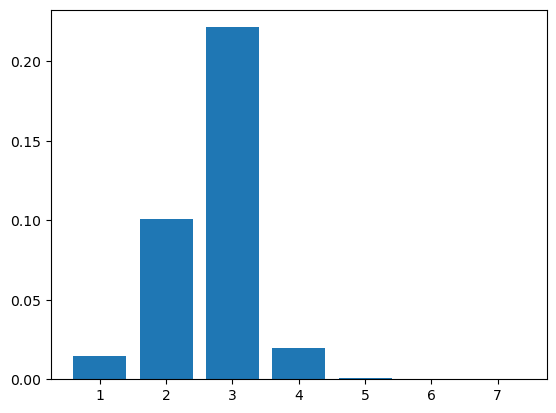

In [37]:
plt.bar(number_degrees,plt_r_squared)
plt_r_squared